In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, f1_score, recall_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore", category=UserWarning) #used to supress the tf version warning.
DATA_PATH = "/content/drive/MyDrive/Project_207/mids-207-summer-2025-keck/data/processed"

In [3]:
## Import data.
X_train = pd.read_csv("/content/drive/MyDrive/Project_207/mids-207-summer-2025-keck/data/processed/hotel_bookings_X_train.csv")
X_val = pd.read_csv("/content/drive/MyDrive/Project_207/mids-207-summer-2025-keck/data/processed/hotel_bookings_X_val.csv")
X_test = pd.read_csv("/content/drive/MyDrive/Project_207/mids-207-summer-2025-keck/data/processed/hotel_bookings_X_test.csv")
Y_train = pd.read_csv("/content/drive/MyDrive/Project_207/mids-207-summer-2025-keck/data/processed/hotel_bookings_Y_train.csv")
Y_val = pd.read_csv("/content/drive/MyDrive/Project_207/mids-207-summer-2025-keck/data/processed/hotel_bookings_Y_val.csv")
Y_test = pd.read_csv("/content/drive/MyDrive/Project_207/mids-207-summer-2025-keck/data/processed/hotel_bookings_Y_test.csv")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of Y_val: {Y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_test: {Y_test.shape}")

Shape of X_train: (71632, 53)
Shape of Y_train: (71632, 1)
Shape of X_val: (23878, 53)
Shape of Y_val: (23878, 1)
Shape of X_test: (23878, 53)
Shape of Y_test: (23878, 1)


In [4]:
X_train

,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,...,meal_sc,meal_undefined,continent_africa,continent_antarctica,continent_asia,continent_europe,continent_north_america,continent_oceania,continent_south_america,continent_unspecified
0,0.708440,0.142909,0.075267,0.269363,0.247970,-0.262007,-0.078768,-0.103409,-0.092924,-0.340531,...,0,0,0,0,0,1,0,0,0,0
1,-1.517151,1.434384,-0.933251,-0.259920,-1.466069,-0.262007,-0.078768,-0.103409,-0.092924,-0.340531,...,0,0,0,0,0,1,0,0,0,0
2,1.280678,1.111515,-0.933251,0.798646,-1.466069,-0.262007,-0.078768,-0.103409,-0.092924,1.206359,...,0,0,0,0,0,1,0,0,0,0
3,-0.105551,-1.471434,1.083786,1.327929,0.247970,-0.262007,-0.078768,-0.103409,-0.092924,-0.340531,...,0,0,0,0,0,1,0,0,0,0
4,1.025938,0.142909,-0.933251,0.269363,0.247970,-0.262007,-0.078768,-0.103409,-0.092924,-0.340531,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71627,-2.376468,0.465778,1.083786,1.327929,0.247970,-0.262007,-0.078768,-0.103409,-0.092924,-0.340531,...,0,0,0,0,0,1,0,0,0,0
71628,1.114128,-0.179959,-0.933251,0.798646,0.247970,-0.262007,-0.078768,-0.103409,-0.092924,1.206359,...,1,0,0,0,0,1,0,0,0,0
71629,0.842469,-0.502828,0.075267,-0.259920,0.247970,-0.262007,-0.078768,-0.103409,-0.092924,-0.340531,...,0,0,0,0,0,1,0,0,0,0
71630,1.165280,0.465778,1.083786,-0.259920,0.247970,-0.262007,-0.078768,1.085579,-0.092924,-0.340531,...,0,0,0,0,0,1,0,0,0,0


In [5]:
Y_train

,is_canceled
0,1
1,0
2,0
3,1
4,0
...,...
71627,0
71628,0
71629,1
71630,1


In [6]:
## Features and their data types.
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71632 entries, 0 to 71631
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       71632 non-null  float64
 1   arrival_date_month              71632 non-null  float64
 2   stays_in_weekend_nights         71632 non-null  float64
 3   stays_in_week_nights            71632 non-null  float64
 4   adults                          71632 non-null  float64
 5   children                        71632 non-null  float64
 6   babies                          71632 non-null  float64
 7   previous_cancellations          71632 non-null  float64
 8   previous_bookings_not_canceled  71632 non-null  float64
 9   booking_changes                 71632 non-null  float64
 10  days_in_waiting_list            71632 non-null  float64
 11  adr                             71632 non-null  float64
 12  required_car_parking_spaces     

# **Baseline Model 1**

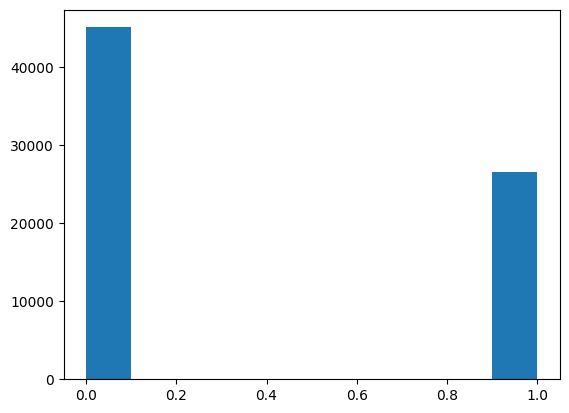

In [7]:
## Check frequency of different classes in the training set.
plt.hist(Y_train)
plt.show()
## Class 0 in "is_cancelled" is the majority class.

In [8]:
## Baseline model: Make every prediction as "not cancelled"/is_cancelled=0 (majority target variable value)
def baseline_model_predict(X):
  n_rows = len(X)
  Y = pd.DataFrame(data=np.zeros(n_rows), columns=['is_canceled'], dtype='int64')
  return Y

In [9]:
Y_bl1_preds_train = baseline_model_predict(X_train)
Y_bl1_preds_val = baseline_model_predict(X_val)

**Performance**

In [10]:
## Accuracy Score
print(f"Training Set Accuracy: {accuracy_score(Y_train, Y_bl1_preds_train)}")
print(f"Validation Set Accuracy: {accuracy_score(Y_val, Y_bl1_preds_val)}")

Training Set Accuracy: 0.6295929193656467
Validation Set Accuracy: 0.6295753413183683


In [11]:
## Log Loss/Cross-entropy Loss
print(f"Training Set Log Loss: {log_loss(Y_train, Y_bl1_preds_train)}")
print(f"Validation Set Log Loss: {log_loss(Y_val, Y_bl1_preds_val)}")

Training Set Log Loss: 13.350824427259402
Validation Set Log Loss: 13.351458004302755


In [12]:
print("==> Classification Report Training data:\n")
print(classification_report(Y_train, Y_bl1_preds_train))
print("==> Classification Report Validation data:\n")
print(classification_report(Y_val, Y_bl1_preds_val))
## Target values to beat on training set: Overall Precision: 0.40, Recall: 0.63, F1 score: 0.49
## Target values to beat on validation set: Overall Precision: 0.40, Recall: 0.63, F1 score: 0.49

==> Classification Report Training data:

              precision    recall  f1-score   support

           0       0.63      1.00      0.77     45099
           1       0.00      0.00      0.00     26533

    accuracy                           0.63     71632
   macro avg       0.31      0.50      0.39     71632
weighted avg       0.40      0.63      0.49     71632

==> Classification Report Validation data:

              precision    recall  f1-score   support

           0       0.63      1.00      0.77     15033
           1       0.00      0.00      0.00      8845

    accuracy                           0.63     23878
   macro avg       0.31      0.50      0.39     23878
weighted avg       0.40      0.63      0.49     23878



# **Modelling**

## **Decision Tree Classifier**

## **Random Forrest Classifier**

Model 1

In [13]:
## Started with "Random Forrest Classifier". Good at handling categorical and numerical data. Easy to define and train.
## Started with some inital values for testing whether the model works and to assess the performance.
rf_clf1 = RandomForestClassifier(n_estimators=2, n_jobs=-1, max_depth=8, random_state=1000)
rf_clf1.fit(X_train, Y_train)

RandomForestClassifier(max_depth=8, n_estimators=2, n_jobs=-1,
                       random_state=1000)

In [14]:
y_preds_train = rf_clf1.predict(X_train)
y_preds_val = rf_clf1.predict(X_val)

In [15]:
## Accuracy Score
print(f"Training Set Accuracy: {accuracy_score(Y_train, y_preds_train)}")
print(f"Validation Set Accuracy: {accuracy_score(Y_val, y_preds_val)}")

Training Set Accuracy: 0.808088563770382
Validation Set Accuracy: 0.8110813300946478


In [16]:
## Log Loss/Cross-entropy Loss
print(f"Training Set Log Loss: {log_loss(Y_train, y_preds_train)}")
print(f"Validation Set Log Loss: {log_loss(Y_val, y_preds_val)}")

Training Set Log Loss: 6.917189288868012
Validation Set Log Loss: 6.809319056801553


In [17]:
print("==> Classification Report Training data:\n")
print(classification_report(Y_train, y_preds_train))
print("==> Classification Report Validation data:\n")
print(classification_report(Y_val, y_preds_val))

==> Classification Report Training data:

              precision    recall  f1-score   support

           0       0.79      0.94      0.86     45099
           1       0.85      0.59      0.69     26533

    accuracy                           0.81     71632
   macro avg       0.82      0.76      0.78     71632
weighted avg       0.81      0.81      0.80     71632

==> Classification Report Validation data:

              precision    recall  f1-score   support

           0       0.80      0.94      0.86     15033
           1       0.85      0.59      0.70      8845

    accuracy                           0.81     23878
   macro avg       0.82      0.77      0.78     23878
weighted avg       0.82      0.81      0.80     23878



In [ ]:
## With the initial hyperparameter values of n_estimators=2 and max_depth=8 the RF model performed better than the baseline model on all metrics.

Model 2

In [18]:
## Increased the number of estimators from 2 to 10 and max_depth from 8 to 20.
rf_clf2 = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=200, max_depth=20)
rf_clf2.fit(X_train, Y_train)

RandomForestClassifier(max_depth=20, n_estimators=10, n_jobs=-1,
                       random_state=200)

In [19]:
y_preds_train = rf_clf2.predict(X_train)
y_preds_val = rf_clf2.predict(X_val)

In [20]:
## Accuracy Score
print(f"Training Set Accuracy: {accuracy_score(Y_train, y_preds_train)}")
print(f"Validation Set Accuracy: {accuracy_score(Y_val, y_preds_val)}")

Training Set Accuracy: 0.8854422604422605
Validation Set Accuracy: 0.8484797721752241


In [21]:
## Log Loss/Cross-entropy Loss
print(f"Training Set Log Loss: {log_loss(Y_train, y_preds_train)}")
print(f"Validation Set Log Loss: {log_loss(Y_val, y_preds_val)}")

Training Set Log Loss: 4.12907945765992
Validation Set Log Loss: 5.461342573156289


In [22]:
print("==> Classification Report Training data:\n")
print(classification_report(Y_train, y_preds_train))
print("==> Classification Report Validation data:\n")
print(classification_report(Y_val, y_preds_val))
## Good improvement in the precision metric for class 0 and class 1 compared to random forest classifier 1.
## Recall value has also improved for it considerably (0.60 to 0.71) so the model is now able to correctly identify a higher proportion of the actual cancelled bookings.
## Slight overfitting is being observed.

==> Classification Report Training data:

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     45099
           1       0.90      0.78      0.83     26533

    accuracy                           0.89     71632
   macro avg       0.89      0.86      0.87     71632
weighted avg       0.89      0.89      0.88     71632

==> Classification Report Validation data:

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     15033
           1       0.85      0.72      0.78      8845

    accuracy                           0.85     23878
   macro avg       0.85      0.82      0.83     23878
weighted avg       0.85      0.85      0.85     23878



In [23]:
features_pd_df = pd.DataFrame(rf_clf2.feature_importances_, index=X_train.columns, columns=['Importance'])
features_pd_df.sort_values(by='Importance', ascending=False)[:10]
## Top 10 features identified by the RF classifier 2

,Importance
deposit_type_no_deposit,0.164385
lead_time,0.134358
deposit_type_non_refund,0.088320
total_of_special_requests,0.078890
adr,0.065666
previous_cancellations,0.064455
is_reserved_room_type,0.044449
booking_changes,0.034164
arrival_date_month,0.032545
required_car_parking_spaces,0.031975


In [24]:
## Using GridSearch CV to find the best possible RF model configurations
# param_grid = {
#     'n_estimators': [5, 10, 15, 20],
#     'max_depth': [10, 15, 20],
#     'min_samples_split': [5, 10],
#     'min_samples_leaf': [2, 4],
#     'max_features': ['sqrt', 'log2'],
#     'class_weight': ['balanced']
# }
param_grid = {
    'n_estimators': [45, 50],
    'max_depth': [15, 25],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [4, 6],
    'max_features': ['sqrt', 0.3],
    'class_weight': ['balanced'],
    'bootstrap': [True]
}

rf_clf3 = RandomForestClassifier(random_state=10)

In [25]:
grid_search = GridSearchCV(estimator=rf_clf3,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',
                           n_jobs=-1,
                           verbose=2)

In [26]:
grid_search.fit(X_train, Y_train)
print("Best parameters found: ", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters found:  {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 25, 'max_features': 0.3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


In [27]:
y_preds_train = best_rf_model.predict(X_train)
y_preds_val = best_rf_model.predict(X_val)

In [28]:
## Accuracy Score
print(f"Training Set Accuracy: {accuracy_score(Y_train, y_preds_train)}")
print(f"Validation Set Accuracy: {accuracy_score(Y_val, y_preds_val)}")

Training Set Accuracy: 0.898048358275631
Validation Set Accuracy: 0.8543847893458414


In [29]:
## Log Loss/Cross-entropy Loss
print(f"Training Set Log Loss: {log_loss(Y_train, y_preds_train)}")
print(f"Validation Set Log Loss: {log_loss(Y_val, y_preds_val)}")

Training Set Log Loss: 3.674709636764611
Validation Set Log Loss: 5.248504181001773


In [30]:
print("==> Classification Report Training data:\n")
print(classification_report(Y_train, y_preds_train))
print("==> Classification Report Validation data:\n")
print(classification_report(Y_val, y_preds_val))

==> Classification Report Training data:

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     45099
           1       0.86      0.87      0.86     26533

    accuracy                           0.90     71632
   macro avg       0.89      0.89      0.89     71632
weighted avg       0.90      0.90      0.90     71632

==> Classification Report Validation data:

              precision    recall  f1-score   support

           0       0.88      0.89      0.88     15033
           1       0.81      0.80      0.80      8845

    accuracy                           0.85     23878
   macro avg       0.84      0.84      0.84     23878
weighted avg       0.85      0.85      0.85     23878



In [ ]:
## Observed that the recall value for the class 1 has improved significantly. So tested increasing the threshold to see if we are able to improve the overall performance.

In [31]:
threshold = 0.57
y_train_proba = best_rf_model.predict_proba(X_train)[:, 1]
y_train_pred_custom = (y_train_proba >= threshold).astype(int)
y_val_proba = best_rf_model.predict_proba(X_val)[:, 1]
y_val_pred_custom = (y_val_proba >= threshold).astype(int)

In [32]:
## Accuracy Score
print(f"Training Set Accuracy: {accuracy_score(Y_train, y_train_pred_custom)}")
print(f"Validation Set Accuracy: {accuracy_score(Y_val, y_val_pred_custom)}")

Training Set Accuracy: 0.894097610006701
Validation Set Accuracy: 0.8572325990451461


In [33]:
## Log Loss/Cross-entropy Loss
print(f"Training Set Log Loss: {log_loss(Y_train, y_train_pred_custom)}")
print(f"Validation Set Log Loss: {log_loss(Y_val, y_val_pred_custom)}")

Training Set Log Loss: 3.8171090379975805
Validation Set Log Loss: 5.145858715281865


In [34]:
print("==> Classification Report Training data:\n")
print(classification_report(Y_train, y_train_pred_custom))
print("==> Classification Report Validation data:\n")
print(classification_report(Y_val, y_val_pred_custom))

==> Classification Report Training data:

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     45099
           1       0.89      0.81      0.85     26533

    accuracy                           0.89     71632
   macro avg       0.89      0.88      0.88     71632
weighted avg       0.89      0.89      0.89     71632

==> Classification Report Validation data:

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     15033
           1       0.85      0.75      0.80      8845

    accuracy                           0.86     23878
   macro avg       0.85      0.84      0.84     23878
weighted avg       0.86      0.86      0.86     23878



In [ ]:
## Compared to the model 2 the overall performance of the model in predicting the cancelled bookings has improved. The recall value has improved by 3% and the f1 score by 2%. However, f1 score stays the same for class 0.

## **Stochastic Gradient Boosting Classifier**

Model 1

In [35]:
## Started with "Gradient Boosting Classifier". Good at handling categorical and numerical data. Easy to define and train.
## Started with some inital values for testing whether the model works and to assess the performance.
gb_clf1 = GradientBoostingClassifier(n_estimators=10, max_depth=8, subsample=0.8, random_state=500, learning_rate=0.05)
gb_clf1.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=8, n_estimators=10,
                           random_state=500, subsample=0.8)

In [36]:
y_preds_train = gb_clf1.predict(X_train)
y_preds_val = gb_clf1.predict(X_val)

In [37]:
## Accuracy Score
print(f"Training Set Accuracy: {accuracy_score(Y_train, y_preds_train)}")
print(f"Validation Set Accuracy: {accuracy_score(Y_val, y_preds_val)}")

Training Set Accuracy: 0.8122905963815055
Validation Set Accuracy: 0.8113326074210571


In [38]:
## Log Loss/Cross-entropy Loss
print(f"Training Set Log Loss: {log_loss(Y_train, y_preds_train)}")
print(f"Validation Set Log Loss: {log_loss(Y_val, y_preds_val)}")

Training Set Log Loss: 6.76573268190291
Validation Set Log Loss: 6.800262103943914


In [39]:
print("==> Classification Report Training data:\n")
print(classification_report(Y_train, y_preds_train))
print("==> Classification Report Validation data:\n")
print(classification_report(Y_val, y_preds_val))
## Performance not on par with the baseline model.

==> Classification Report Training data:

              precision    recall  f1-score   support

           0       0.78      0.97      0.87     45099
           1       0.91      0.55      0.68     26533

    accuracy                           0.81     71632
   macro avg       0.85      0.76      0.78     71632
weighted avg       0.83      0.81      0.80     71632

==> Classification Report Validation data:

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     15033
           1       0.90      0.55      0.68      8845

    accuracy                           0.81     23878
   macro avg       0.84      0.76      0.77     23878
weighted avg       0.83      0.81      0.80     23878



Model 2

In [40]:
gb_clf2 = GradientBoostingClassifier(n_estimators=120, max_depth=15, subsample=0.8, random_state=500, learning_rate=0.05)
gb_clf2.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=15, n_estimators=120,
                           random_state=500, subsample=0.8)

In [41]:
y_preds_train = gb_clf2.predict(X_train)
y_preds_val = gb_clf2.predict(X_val)

In [42]:
## Accuracy Score
print(f"Training Set Accuracy: {accuracy_score(Y_train, y_preds_train)}")
print(f"Validation Set Accuracy: {accuracy_score(Y_val, y_preds_val)}")

Training Set Accuracy: 0.9486123520214429
Validation Set Accuracy: 0.8633888935421727


In [43]:
## Log Loss/Cross-entropy Loss
print(f"Training Set Log Loss: {log_loss(Y_train, y_preds_train)}")
print(f"Validation Set Log Loss: {log_loss(Y_val, y_preds_val)}")

Training Set Log Loss: 1.8521985722210776
Validation Set Log Loss: 4.9239633702697105


In [44]:
print("==> Classification Report Training data:\n")
print(classification_report(Y_train, y_preds_train))
print("==> Classification Report Validation data:\n")
print(classification_report(Y_val, y_preds_val))

==> Classification Report Training data:

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     45099
           1       0.95      0.91      0.93     26533

    accuracy                           0.95     71632
   macro avg       0.95      0.94      0.94     71632
weighted avg       0.95      0.95      0.95     71632

==> Classification Report Validation data:

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     15033
           1       0.86      0.76      0.80      8845

    accuracy                           0.86     23878
   macro avg       0.86      0.84      0.85     23878
weighted avg       0.86      0.86      0.86     23878



In [ ]:
## Compared to the random forrest model 3 the stochastic gradient boost model 2 has a slightly better perfomance.
## The recall and precision on class 0 has increased by 1%. The recall and precision on class 1 has increased by 1%.
## There is some overfitting observed due to the relatively wider metric difference between the train and validation set.
## But this model is still showing good performance on the unseen data.

## **Neural Network Model**

In [45]:
def build_model():
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  no_deposit = tf.keras.layers.Input(shape=(53,), dtype='int64', name='no_deposit_input')
  hidden_1 = tf.keras.layers.Dense(units=32, activation='relu', name='hidden_layer_1')(no_deposit)
  hidden_2 = tf.keras.layers.Dense(units=32, activation='relu', name='hidden_layer_2')(hidden_1)
  hidden_3 = tf.keras.layers.Dense(units=32, activation='relu', name='hidden_layer_3')(hidden_2)
  is_cancelled = tf.keras.layers.Dense(units=1, activation='sigmoid', name='cancelled')(hidden_3)
  test_model = tf.keras.Model(inputs=no_deposit, outputs=is_cancelled, name='test')

  test_model.compile(
      optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
      loss='binary_crossentropy',
      metrics=['accuracy']
  )

  return test_model

In [46]:
nn_model_1 = build_model()
nn_model_1.summary()
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = nn_model_1.fit(
    x=X_train,
    y=Y_train,
    epochs=10,
    batch_size=128,
    validation_data=(
        X_val,
        Y_val
    ),
    callbacks=[early_stop]
)

Model: "test"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ no_deposit_input (InputLayer)   │ (None, 53)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 32)             │         1,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cancelled (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,873 (15.13 KB)

 Trainable params: 3,873 (15.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7790 - loss: 0.4392 - val_accuracy: 0.7962 - val_loss: 0.3986
Epoch 2/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7966 - loss: 0.4000 - val_accuracy: 0.8058 - val_loss: 0.3921
Epoch 3/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8007 - loss: 0.3943 - val_accuracy: 0.8059 - val_loss: 0.3894
Epoch 4/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7998 - loss: 0.3908 - val_accuracy: 0.8070 - val_loss: 0.3876
Epoch 5/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8007 - loss: 0.3897 - val_accuracy: 0.8060 - val_loss: 0.3848
Epoch 6/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8025 - loss: 0.3860 - val_accuracy: 0.8093 - val_loss: 0.3860
Epoch 7/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8023 - loss: 0.3843 - val_accuracy: 0.8090 - val_loss: 0.3844
Epoch 8/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8045 - loss: 0.3830 - val_accuracy: 0.

In [47]:
y_preds_train = nn_model_1.predict(X_train)
y_preds_val = nn_model_1.predict(X_val)
y_preds_train_class = (y_preds_train > 0.5).astype(int)
y_preds_val_class = (y_preds_val > 0.5).astype(int)

2239/2239 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [48]:
## Accuracy Score
print(f"Training Set Accuracy: {accuracy_score(Y_train, y_preds_train_class)}")
print(f"Validation Set Accuracy: {accuracy_score(Y_val, y_preds_val_class)}")

Training Set Accuracy: 0.8065668974759884
Validation Set Accuracy: 0.8090292319289722


In [49]:
## Log Loss/Cross-entropy Loss
print(f"Training Set Log Loss: {log_loss(Y_train, y_preds_train)}")
print(f"Validation Set Log Loss: {log_loss(Y_val, y_preds_val)}")

Training Set Log Loss: 0.38121003236928785
Validation Set Log Loss: 0.3844034125901228


In [ ]:
print("==> Classification Report Training data:\n")
print(classification_report(Y_train, y_preds_train_class))
print("==> Classification Report Validation data:\n")
print(classification_report(Y_val, y_preds_val_class))

==> Classification Report Training data:

              precision    recall  f1-score   support

           0       0.79      0.94      0.86     45099
           1       0.85      0.57      0.68     26533

    accuracy                           0.80     71632
   macro avg       0.82      0.76      0.77     71632
weighted avg       0.81      0.80      0.79     71632

==> Classification Report Validation data:

              precision    recall  f1-score   support

           0       0.79      0.94      0.86     15033
           1       0.85      0.58      0.69      8845

    accuracy                           0.81     23878
   macro avg       0.82      0.76      0.78     23878
weighted avg       0.81      0.81      0.80     23878

